In [4]:
# Import Needed Liberaries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import r2_score


In [5]:
plt.style.use('ggplot')

In [9]:
# Import our Data:
df0 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
print(df0.head())

   Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
0  Province/State          NaN      NaN      NaN      NaN     NaN         NaN   
1         1/23/20          0.0      0.0      0.0      0.0     0.0         0.0   
2         1/24/20          0.0      0.0      0.0      0.0     0.0         0.0   
3         1/25/20          0.0      0.0      0.0      0.0     0.0         0.0   
4         1/26/20          0.0      0.0      0.0      0.0     0.0         0.0   

   Antigua and Barbuda  Argentina  Armenia  ... Uruguay Uzbekistan Vanuatu  \
0                  NaN        NaN      NaN  ...     NaN        NaN     NaN   
1                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
2                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
3                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
4                  0.0        0.0      0.0  ...     0.0        0.0     0.0   

  Venezuela Vietnam West Bank and Gaza Winte

In [8]:
df1 = pd.read_csv("CONVENIENT_global_deaths.csv")
print(df1.head())

   Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
0  Province/State          NaN      NaN      NaN      NaN     NaN         NaN   
1         1/23/20          0.0      0.0      0.0      0.0     0.0         0.0   
2         1/24/20          0.0      0.0      0.0      0.0     0.0         0.0   
3         1/25/20          0.0      0.0      0.0      0.0     0.0         0.0   
4         1/26/20          0.0      0.0      0.0      0.0     0.0         0.0   

   Antigua and Barbuda  Argentina  Armenia  ... Uruguay Uzbekistan Vanuatu  \
0                  NaN        NaN      NaN  ...     NaN        NaN     NaN   
1                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
2                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
3                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
4                  0.0        0.0      0.0  ...     0.0        0.0     0.0   

  Venezuela Vietnam West Bank and Gaza Winte

In [10]:
# lets prepare our data:

# Create an empty DataFrame to store country-wise COVID-19 cases
world = pd.DataFrame({"Country": [], "Cases": []})

# Extract country names from the columns of DataFrame 'df0'
world["Country"] = df0.iloc[:, 1:].columns

# Calculate total cases for each country
cases = []
for country in world["Country"]:
    cases.append(pd.to_numeric(df0[country][1:]).sum())
world["Cases"] = cases

# Clean country names
country_list = list(world["Country"].values)
for i in range(len(country_list)):
    country = country_list[i]
    sayac = 0
    for j in country:
        if j == ".":
            country = country[:sayac]
            break
        elif j == "(":
            country = country[:sayac - 1]
            break
        else:
            sayac += 1
    country_list[i] = country

# Update country names in the DataFrame
world["Country"] = country_list

# Group by country and sum up the cases
world = world.groupby("Country")["Cases"].sum().reset_index()

# Display the first few rows of the processed DataFrame
world.head()

# Read continent data from CSV file
continent = pd.read_csv("continents2.csv")

# Convert continent names to uppercase
continent["name"] = continent["name"].str.upper()


In [11]:
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [15]:
print(continent.head())

             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     AFGHANISTAN      AF     AFG             4  ISO 3166-2:AF     Asia   
1   ÅLAND ISLANDS      AX     ALA           248  ISO 3166-2:AX   Europe   
2         ALBANIA      AL     ALB             8  ISO 3166-2:AL   Europe   
3         ALGERIA      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  AMERICAN SAMOA      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       Na

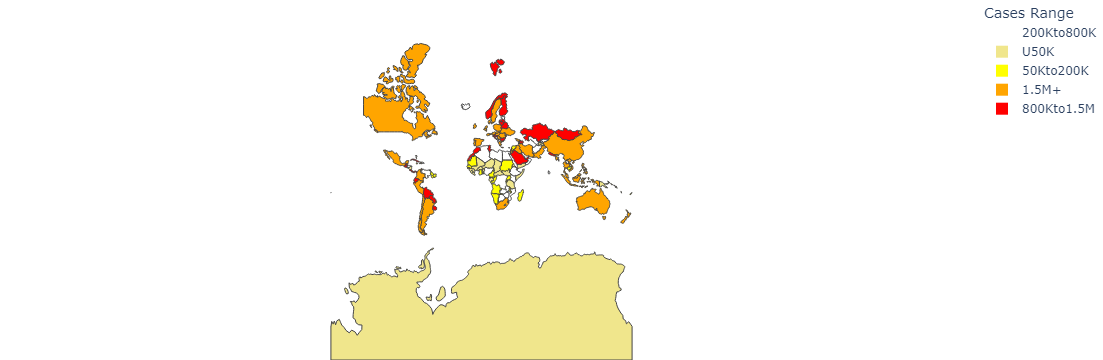

In [17]:
# Geographical visualization of the Global Spread of Covid-19 cases around the world:

# Create bins for cases range
world["Cases Range"] = pd.cut(world["Cases"],
                              [-150000, 50000, 200000, 800000, 1500000, 15000000],
                              labels=["U50K", "50Kto200K", "200Kto800K", "800Kto1.5M", "1.5M+"])

# Map country names to continent alpha3 codes
alpha = []
for country in world["Country"].str.upper().values:
    if country == "BRUNEI":
        country = "BRUNEI DARUSSALAM"
    elif country == "US":
        country = "UNITED STATES"
    
    if len(continent[continent["name"] == country]["alpha-3"].values) == 0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"] == country]["alpha-3"].values[0])
world["Alpha3"] = alpha

# Create choropleth map
fig = px.choropleth(world.dropna(),
                    locations="Alpha3",
                    color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white", "khaki", "yellow", "orange", "red"])

# Update map settings
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Show the figure
fig.show()


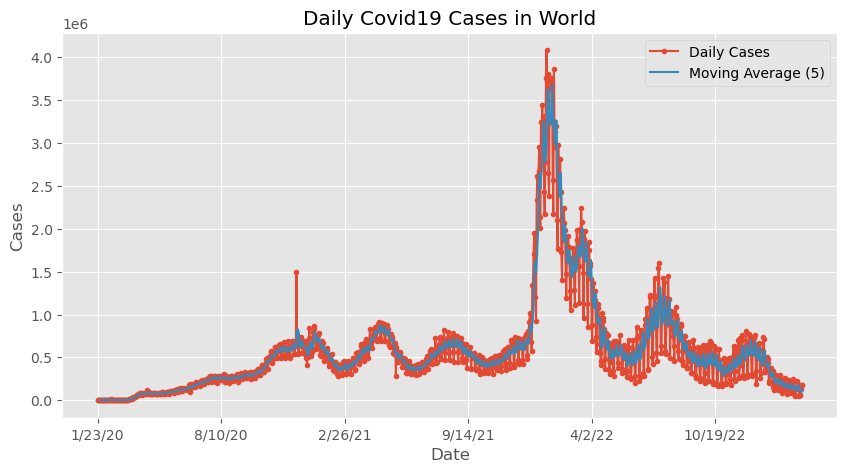

In [18]:
# Daily Cases around the world:

# Calculate total cases for each date from DataFrame df0
cases_count = []
for i in range(1, len(df0)):
    cases_count.append(sum(pd.to_numeric(df0.iloc[i, 1:].values)))

# Create DataFrame for cases
df_cases = pd.DataFrame()
df_cases["Date"] = df0["Country/Region"][1:]
df_cases["Cases"] = cases_count
df_cases = df_cases.set_index("Date")

# Calculate total deaths for each date from DataFrame df1
deaths_count = []
for i in range(1, len(df1)):
    deaths_count.append(sum(pd.to_numeric(df1.iloc[i, 1:].values)))

# Add deaths data to the existing DataFrame
df_cases["Deaths"] = deaths_count

# Plotting
df_cases["Cases"].plot(title="Daily Covid19 Cases in World", marker=".", figsize=(10, 5), label="Daily Cases")
df_cases["Cases"].rolling(window=5).mean().plot(figsize=(10, 5), label="Moving Average (5)")
plt.ylabel("Cases")
plt.legend()
plt.show()


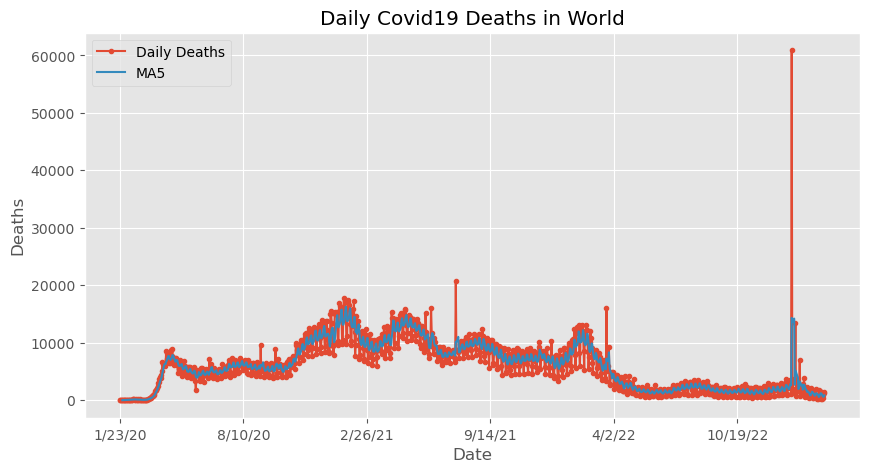

In [20]:
# Daily Death Cases around the world:

# Plotting daily Covid19 deaths in the world
df_cases["Deaths"].plot(title="Daily Covid19 Deaths in World", marker=".", figsize=(10, 5), label="Daily Deaths")

# Plotting moving average of deaths
df_cases["Deaths"].rolling(window=5).mean().plot(figsize=(10, 5), label="MA5")

# Adding labels and legend
plt.ylabel("Deaths")
plt.legend()

# Show the plot
plt.show()


C:\Users\hytham2022\AppData\Local\Temp\ipykernel_17848\323483973.py:21: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

19:36:19 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing


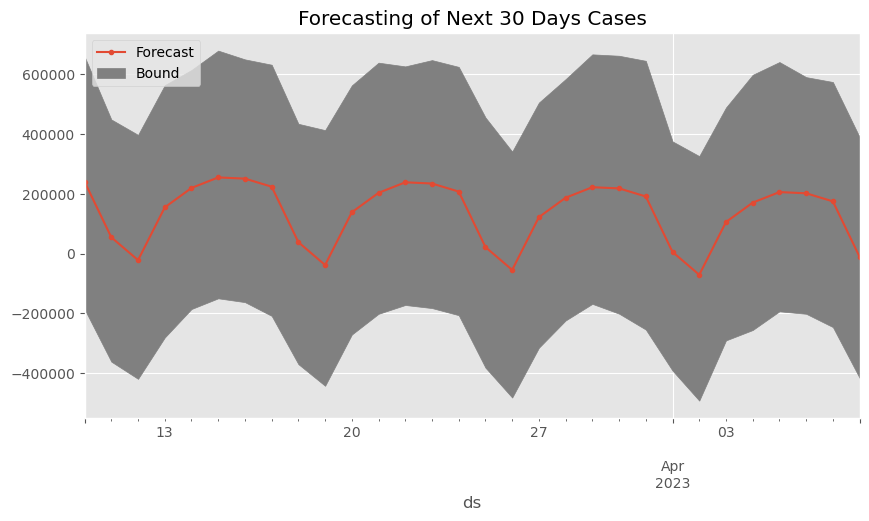

In [24]:
# Now lets predict the number of cases in the next 30 days:

class Fbprophet(object):
    def fit(self, data):
        self.data = data
        self.model = Prophet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=False)
        self.model.fit(self.data)

    def forecast(self, periods, freq):
        self.future = self.model.make_future_dataframe(periods=periods, freq=freq)
        self.df_forecast = self.model.predict(self.future)

    def plot(self, xlabel="Years", ylabel="Values"):
        self.model.plot(self.df_forecast, xlabel=xlabel, ylabel=ylabel, figsize=(9, 4))
        self.model.plot_components(self.df_forecast, figsize=(9, 6))

    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df_cases)])

df_fb = pd.DataFrame({"ds": [], "y": []})
df_fb["ds"] = pd.to_datetime(df_cases.index)
df_fb["y"] = df_cases.iloc[:, 0].values

model = Fbprophet()
model.fit(df_fb)
model.forecast(30, "D")
model.R2()

forecast = model.df_forecast[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail(30).reset_index().set_index("ds").drop("index", axis=1)
forecast["yhat"].plot(marker=".", figsize=(10, 5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"], color="gray")
plt.legend(["Forecast", "Bound"], loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()
